# 형태소 분석

## [형태소](https://ko.wikipedia.org/wiki/%ED%98%95%ED%83%9C%EC%86%8C)
형태소(morpheme)는 언어학에서 (일반적인 정의를 따르면) 일정한 의미가 있는 가장 작은 말의 단위로 발화체 내에서 따로 떠어낼 수 있는 것을 말한다.
즉, 더 분석하면 뜻이 없어지는 말의 단위이다.

예) 한나가 책을 보았다.

### 형태소의 의미/기능으로 구분
- 실질형태소
  > 어휘적 의미가 있는 형태소로 어떤 대상이나 상태, 동작을 가리키는 형태소를 말한다. 일반적으로 명사, 동사, 형용사, 부사가 이에 속한다.
  > 위의 예에서는 "한나", "책", "보"가 이에 해당한다.
- 형식형태소
  > 문법적 의미가 있는 형태소로 어휘형태소와 함께 스여 그들 사이의 관계를 나타내는 기능을 하는 행태소를 말한다. 한국어에서는 조사, 어미가 이에 속한다.
  > 위의 예에서는 "가", "을", "았", "다"가 이에 해당한다.

### 형태소의 의존성으로 구분
- 자립형태소
    > 다른 형태소 없이 홀로 어절을 이루어 사용될 수 있는 형태소를 말한다. 한국어에서는 일반적으로 명사, 대명사, 수사, 관형사, 부사, 감탄사 등이 이에 속한다.
    > 위의 예에서는 "한나", "책"가 이에 해당한다.
- 의존형태소
    > 문장에서 반드시 다른 형태소와 함께 쓰여서 어절을 이루는 형태소를 말한다. 한국어에서는 조사와 어미는 물론 이에 속하고 용언의 어간 즉 동사, 형용사의 어간이 이에 속한다.
    > 위의 예에서는 "가", "을", "보", "았", "다"가 이에 해당한다.

## 형태소 분석기
형태소 분석기는 품사를 태깅해주는 (무슨 품사인지 마킹해주는)는 라이브러리입니다.
영어에서의 품사는 문장에서 위치나 말할 때 귾어 있는 띄어쓰기 단위로 되어 있기 때문에 POS(Part of Speech) tagger라고 합니다. 반면에 한국어에서는 단어를 다 잘라내야 제대로 형태소를 갈라낼 수 있어서 Morphology Analyzer라고 합니다.

예)
- 우리는 한국인이다 -> 우리(명사), 는(조사)
- We are Korean -> We(명사)

### [nltk](https://www.nltk.org/)
python에서 가장 오래되고 유명한 자연어 처리 라이브러리(한국어 미지원)

In [1]:
import nltk

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
sentence = """
At eight o'clock on Thursday morning
Arthur didn't feel very good."""
sentence

"\nAt eight o'clock on Thursday morning\nArthur didn't feel very good."

토큰화

In [3]:
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

문장속 단어에 품사를 적용하기

In [4]:
tagged = nltk.pos_tag(tokens)
tagged

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

동사, 명사만

In [5]:
lst = []
for token, pos in tagged:
  if pos.startswith("N") or pos.startswith("V"): # N: 명사, V: 동사
    lst.append(token)

In [6]:
[ token for token, pos in tagged if pos.startswith("N") or pos.startswith("V") ]

["o'clock", 'Thursday', 'morning', 'Arthur', 'did', 'feel']

### [spacy](https://spacy.io/)
자연어 처리를 위한 python 기반의 오픈 소스 라이브러리

```shell
pip install spacy
python -m spacy download en
python -m spacy download ko_core_news_sm
```

#### 영어

In [7]:
import spacy
from spacy.lang.en.examples import sentences

In [8]:
# 모델 객체 생성
nlp = spacy.load("en_core_web_sm")
# 문장 모델 적용(예측)
doc = nlp(sentences[0])

print(doc.text)
print('-'*80)
print("단어","원형","품사","태그", "의존성", "모양", "알파벳", "금칙어",sep="\t")
for token in doc:
    print(
        token.text # 단어
        , token.lemma_ # 원형
        , token.pos_ # 품사
        , token.tag_ # 태그
        , token.dep_ # 의존성
        , token.shape_ # 모양
        , token.is_alpha # 알파벳
        , token.is_stop # 금칙어
        , sep='\t')

Apple is looking at buying U.K. startup for $1 billion
--------------------------------------------------------------------------------
단어	원형	품사	태그	의존성	모양	알파벳	금칙어
Apple	Apple	PROPN	NNP	nsubj	Xxxxx	True	False
is	be	AUX	VBZ	aux	xx	True	True
looking	look	VERB	VBG	ROOT	xxxx	True	False
at	at	ADP	IN	prep	xx	True	True
buying	buy	VERB	VBG	pcomp	xxxx	True	False
U.K.	U.K.	PROPN	NNP	dobj	X.X.	False	False
startup	startup	NOUN	NN	dep	xxxx	True	False
for	for	ADP	IN	prep	xxx	True	True
$	$	SYM	$	quantmod	$	False	False
1	1	NUM	CD	compound	d	False	False
billion	billion	NUM	CD	pobj	xxxx	True	False


#### 한국어

In [9]:
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding

In [10]:
!python -m spacy download ko_core_news_sm

2023-09-06 00:45:37.644249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 45.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ko_core_news_sm')


In [11]:
import spacy
from spacy.lang.ko.examples import sentences

In [12]:
sentences[0]

'애플이 영국의 스타트업을 10억 달러에 인수하는 것을 알아보고 있다.'

In [13]:
nlp = spacy.load("ko_core_news_sm")

doc = nlp(sentences[0])

print(doc.text)
print('-'*80)
print("단어","원형","품사","태그", "의존성", "모양", "알파벳", "금칙어",sep="\t")
for token in doc:
    print(
        token.text # 단어
        , token.lemma_ # 원형
        , token.pos_ # 품사
        , token.tag_ # 태그
        , token.dep_ # 의존성
        , token.shape_ # 모양
        , token.is_alpha # 알파벳
        , token.is_stop # 금칙어
        , sep='\t')

# for token in doc:
#     print(token.text, token.pos_, token.dep_)

애플이 영국의 스타트업을 10억 달러에 인수하는 것을 알아보고 있다.
--------------------------------------------------------------------------------
단어	원형	품사	태그	의존성	모양	알파벳	금칙어
애플이	애플+이	NOUN	ncn+jxt	dislocated	xxx	True	False
영국의	영국+의	PROPN	nq+jcm	nmod	xxx	True	False
스타트업을	스타트업+을	NOUN	ncn+jcs	nsubj	xxxx	True	False
10억	10+억	NUM	nnc+nnc	compound	ddx	False	False
달러에	달러+에	ADV	nbu+jca	obl	xxx	True	False
인수하는	인수+하+는	VERB	ncpa+xsv+etm	acl	xxxx	True	False
것을	것+을	NOUN	nbn+jco	obj	xx	True	False
알아보고	알아보+고	AUX	pvg+ecx+px+ecx	ROOT	xxxx	True	False
있다	있+다	AUX	px+ef	aux	xx	True	False
.	.	PUNCT	sf	punct	.	False	False


### [Konlpy](https://konlpy-ko.readthedocs.io/ko/v0.4.3/)

Konlpy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았습니다.
- Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  - http://semanticweb.kaist.ac.kr/hannanum/

- Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
  - http://kkma.snu.ac.kr/

- Komoran: 코모란. Shineware에서 개발.
  - https://github.com/shin285/KOMORAN

- Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
  - https://bitbucket.org/eunjeon/mecab-ko

- Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  - https://github.com/open-korean-text/open-korean-text

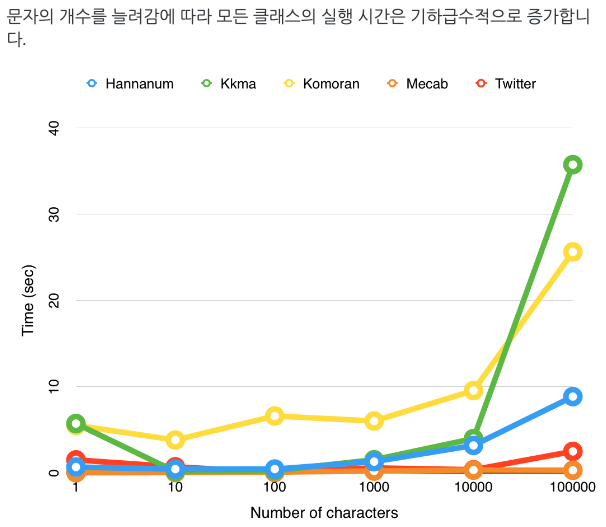

In [14]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git # 다운로드
!bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh # 소스를 실행

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 5.12 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.9 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-09-06 00:45:58--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuser

#### Okt(previous Twitter)

In [15]:
from konlpy.tag import Okt

In [16]:
okt = Okt()

In [17]:
txt1 = "아버지가방에들어가신다."
txt2 = "아버지가 방에 들어가신다."

형태소 분석

In [18]:
okt.pos(txt1)

[('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [19]:
okt.pos(txt2)

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [20]:
result = [] # 결과를 담을 수 있는 변수 선언
for token in okt.pos(txt2): # 형태소 분석 결과(데이터, 형태소)를 하나씩 검사하기
  if token[1][0] in 'NVJ': # 각각의 형태소 분석 결과(데이터, 형태소) 중 형태소 중 첫번째 글자가 명사(N), 동사(V), 조사(J)만 추출(필터링)
    result.append(token[0]) # 즉, 명사, 동사, 조사만 결과에 담기...

result

['아버지', '가', '방', '에', '들어가신다']

In [21]:
[ token[0] for token in okt.pos(txt2) if token[1][0] in "NVJ" ] # 명사, 동사, 조사

['아버지', '가', '방', '에', '들어가신다']

명사만 분석

In [22]:
okt.nouns(txt2)

['아버지', '방']

#### Mecab

In [23]:
from konlpy.tag import Mecab

In [24]:
mec = Mecab()

In [25]:
txt1 = "아버지가방에들어가신다."
txt2 = "아버지가 방에 들어가신다."

형태소 분석

In [26]:
mec.pos(txt1)

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('신다', 'EP+EF'),
 ('.', 'SF')]

In [27]:
mec.pos(txt2)

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('신다', 'EP+EF'),
 ('.', 'SF')]

In [28]:
[ token[0] for token in mec.pos(txt1) if token[1][0] in "NVJ" ] # 명사, 동사, 조사

['아버지', '가', '방', '에', '들어가']

명사만 분석

In [29]:
mec.nouns(txt1)

['아버지', '방']

### [kiwi(추천)](https://github.com/bab2min/Kiwi#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8)
- [품사태그정보](https://github.com/bab2min/Kiwi#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8)

In [30]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=f9a88b4423b732209ce2ed5f5491e820e5d5c067b40a81b4404e1076e746f33c
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [31]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [32]:
txt1 = "아버지가방에들어가신다."
txt2 = "아버지가 방에 들어가신다."

In [33]:
result1 = kiwi.analyze(txt1,top_n=3)
result1

[([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가', tag='JKS', start=3, len=1),
   Token(form='방', tag='NNG', start=4, len=1),
   Token(form='에', tag='JKB', start=5, len=1),
   Token(form='들어가', tag='VV', start=6, len=3),
   Token(form='시', tag='EP', start=9, len=1),
   Token(form='ᆫ다', tag='EF', start=9, len=2),
   Token(form='.', tag='SF', start=11, len=1)],
  -28.60936164855957),
 ([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가방', tag='NNG', start=3, len=2),
   Token(form='에', tag='JKB', start=5, len=1),
   Token(form='들어가', tag='VV', start=6, len=3),
   Token(form='시', tag='EP', start=9, len=1),
   Token(form='ᆫ다', tag='EF', start=9, len=2),
   Token(form='.', tag='SF', start=11, len=1)],
  -31.23612403869629),
 ([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가', tag='JKS', start=3, len=1),
   Token(form='방', tag='NNG', start=4, len=1),
   Token(form='에', tag='JKB', start=5, len=1),
   Token(form='들어가', tag='VV', start=6, len=3),
   T

In [34]:
result2 = kiwi.analyze(txt2,top_n=3)
result2

[([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가', tag='JKS', start=3, len=1),
   Token(form='방', tag='NNG', start=5, len=1),
   Token(form='에', tag='JKB', start=6, len=1),
   Token(form='들어가', tag='VV', start=8, len=3),
   Token(form='시', tag='EP', start=11, len=1),
   Token(form='ᆫ다', tag='EF', start=11, len=2),
   Token(form='.', tag='SF', start=13, len=1)],
  -28.60936164855957),
 ([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가', tag='JKS', start=3, len=1),
   Token(form='방', tag='NNG', start=5, len=1),
   Token(form='에', tag='JKB', start=6, len=1),
   Token(form='들어가', tag='VV', start=8, len=3),
   Token(form='어', tag='EC', start=10, len=1),
   Token(form='신', tag='NNG', start=11, len=1),
   Token(form='다.', tag='SB', start=12, len=2)],
  -57.53723907470703),
 ([Token(form='아버지', tag='NNG', start=0, len=3),
   Token(form='가', tag='JKS', start=3, len=1),
   Token(form='방', tag='NNG', start=5, len=1),
   Token(form='에', tag='JKB', start=6, len=1),
 

In [35]:
[ token.form for token in  result1[0][0]]

['아버지', '가', '방', '에', '들어가', '시', 'ᆫ다', '.']

In [36]:
result = kiwi.tokenize(txt1)
result

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가', tag='JKS', start=3, len=1),
 Token(form='방', tag='NNG', start=4, len=1),
 Token(form='에', tag='JKB', start=5, len=1),
 Token(form='들어가', tag='VV', start=6, len=3),
 Token(form='시', tag='EP', start=9, len=1),
 Token(form='ᆫ다', tag='EF', start=9, len=2),
 Token(form='.', tag='SF', start=11, len=1)]

In [37]:
tokens = [ (t.form , t.tag)   for t in result ]
tokens

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ᆫ다', 'EF'),
 ('.', 'SF')]

In [38]:
[ token.form for token in result ]

['아버지', '가', '방', '에', '들어가', '시', 'ᆫ다', '.']

In [39]:
[ token.form for token in result if token.tag[0] in "N" ]

['아버지', '방']

In [40]:
[ token.form for token in result if token.tag[0] in "V" ]

['들어가']

In [41]:
txt_list = [txt1, txt2]
txt_list

['아버지가방에들어가신다.', '아버지가 방에 들어가신다.']

In [42]:
result = kiwi.tokenize(txt_list)
result

In [43]:
for tokens in result:
    print(tokens)

[Token(form='아버지', tag='NNG', start=0, len=3), Token(form='가', tag='JKS', start=3, len=1), Token(form='방', tag='NNG', start=4, len=1), Token(form='에', tag='JKB', start=5, len=1), Token(form='들어가', tag='VV', start=6, len=3), Token(form='시', tag='EP', start=9, len=1), Token(form='ᆫ다', tag='EF', start=9, len=2), Token(form='.', tag='SF', start=11, len=1)]
[Token(form='아버지', tag='NNG', start=0, len=3), Token(form='가', tag='JKS', start=3, len=1), Token(form='방', tag='NNG', start=5, len=1), Token(form='에', tag='JKB', start=6, len=1), Token(form='들어가', tag='VV', start=8, len=3), Token(form='시', tag='EP', start=11, len=1), Token(form='ᆫ다', tag='EF', start=11, len=2), Token(form='.', tag='SF', start=13, len=1)]


- 불용어 적용

In [52]:
from kiwipiepy.utils import Stopwords
stopwords =  Stopwords()
result = kiwi.tokenize(txt_list, stopwords=stopwords) # 토큰화 & 불용어

for tokens in result:
    print(tokens)

[Token(form='아버지', tag='NNG', start=0, len=3), Token(form='방', tag='NNG', start=4, len=1), Token(form='들어가', tag='VV', start=6, len=3), Token(form='시', tag='EP', start=9, len=1)]
[Token(form='아버지', tag='NNG', start=0, len=3), Token(form='방', tag='NNG', start=5, len=1), Token(form='들어가', tag='VV', start=8, len=3), Token(form='시', tag='EP', start=11, len=1)]


- 불용어 리스트

In [45]:
stopwords =  Stopwords()
stopwords.stopwords # 불용어 리스트

{('ᆫ', 'ETM'),
 ('ᆫ', 'JX'),
 ('ᆫ다', 'EF'),
 ('ᆯ', 'ETM'),
 ('가', 'JKS'),
 ('같', 'VA'),
 ('것', 'NNB'),
 ('게', 'EC'),
 ('겠', 'EP'),
 ('고', 'EC'),
 ('고', 'JKQ'),
 ('과', 'JC'),
 ('과', 'JKB'),
 ('그', 'MM'),
 ('그', 'NP'),
 ('기', 'ETN'),
 ('까지', 'JX'),
 ('나', 'NP'),
 ('년', 'NNB'),
 ('는', 'ETM'),
 ('는', 'JX'),
 ('다', 'EC'),
 ('다', 'EF'),
 ('다고', 'EC'),
 ('다는', 'ETM'),
 ('대하', 'VV'),
 ('더', 'MAG'),
 ('던', 'ETM'),
 ('도', 'JX'),
 ('되', 'VV'),
 ('되', 'XSV'),
 ('들', 'XSN'),
 ('등', 'NNB'),
 ('따르', 'VV'),
 ('때', 'NNG'),
 ('때문', 'NNB'),
 ('라', 'EC'),
 ('라는', 'ETM'),
 ('로', 'JKB'),
 ('를', 'JKO'),
 ('만', 'JX'),
 ('만', 'NR'),
 ('말', 'NNG'),
 ('며', 'EC'),
 ('면', 'EC'),
 ('면서', 'EC'),
 ('명', 'NNB'),
 ('받', 'VV'),
 ('보', 'VV'),
 ('부터', 'JX'),
 ('사람', 'NNG'),
 ('성', 'XSN'),
 ('수', 'NNB'),
 ('아니', 'VCN'),
 ('않', 'VX'),
 ('어', 'EC'),
 ('어', 'EF'),
 ('어서', 'EC'),
 ('어야', 'EC'),
 ('없', 'VA'),
 ('었', 'EP'),
 ('에', 'JKB'),
 ('에게', 'JKB'),
 ('에서', 'JKB'),
 ('와', 'JC'),
 ('와', 'JKB'),
 ('우리', 'NP'),
 ('원', 'NNB'),


- 불용어 추가

In [46]:
stopwords.add("NLP")
stopwords.stopwords

{('NLP', 'NNP'),
 ('ᆫ', 'ETM'),
 ('ᆫ', 'JX'),
 ('ᆫ다', 'EF'),
 ('ᆯ', 'ETM'),
 ('가', 'JKS'),
 ('같', 'VA'),
 ('것', 'NNB'),
 ('게', 'EC'),
 ('겠', 'EP'),
 ('고', 'EC'),
 ('고', 'JKQ'),
 ('과', 'JC'),
 ('과', 'JKB'),
 ('그', 'MM'),
 ('그', 'NP'),
 ('기', 'ETN'),
 ('까지', 'JX'),
 ('나', 'NP'),
 ('년', 'NNB'),
 ('는', 'ETM'),
 ('는', 'JX'),
 ('다', 'EC'),
 ('다', 'EF'),
 ('다고', 'EC'),
 ('다는', 'ETM'),
 ('대하', 'VV'),
 ('더', 'MAG'),
 ('던', 'ETM'),
 ('도', 'JX'),
 ('되', 'VV'),
 ('되', 'XSV'),
 ('들', 'XSN'),
 ('등', 'NNB'),
 ('따르', 'VV'),
 ('때', 'NNG'),
 ('때문', 'NNB'),
 ('라', 'EC'),
 ('라는', 'ETM'),
 ('로', 'JKB'),
 ('를', 'JKO'),
 ('만', 'JX'),
 ('만', 'NR'),
 ('말', 'NNG'),
 ('며', 'EC'),
 ('면', 'EC'),
 ('면서', 'EC'),
 ('명', 'NNB'),
 ('받', 'VV'),
 ('보', 'VV'),
 ('부터', 'JX'),
 ('사람', 'NNG'),
 ('성', 'XSN'),
 ('수', 'NNB'),
 ('아니', 'VCN'),
 ('않', 'VX'),
 ('어', 'EC'),
 ('어', 'EF'),
 ('어서', 'EC'),
 ('어야', 'EC'),
 ('없', 'VA'),
 ('었', 'EP'),
 ('에', 'JKB'),
 ('에게', 'JKB'),
 ('에서', 'JKB'),
 ('와', 'JC'),
 ('와', 'JKB'),
 ('우리', 'NP')

- 불용어 제거

In [47]:
stopwords.remove(["NLP"])
stopwords.stopwords

{('ᆫ', 'ETM'),
 ('ᆫ', 'JX'),
 ('ᆫ다', 'EF'),
 ('ᆯ', 'ETM'),
 ('가', 'JKS'),
 ('같', 'VA'),
 ('것', 'NNB'),
 ('게', 'EC'),
 ('겠', 'EP'),
 ('고', 'EC'),
 ('고', 'JKQ'),
 ('과', 'JC'),
 ('과', 'JKB'),
 ('그', 'MM'),
 ('그', 'NP'),
 ('기', 'ETN'),
 ('까지', 'JX'),
 ('나', 'NP'),
 ('년', 'NNB'),
 ('는', 'ETM'),
 ('는', 'JX'),
 ('다', 'EC'),
 ('다', 'EF'),
 ('다고', 'EC'),
 ('다는', 'ETM'),
 ('대하', 'VV'),
 ('더', 'MAG'),
 ('던', 'ETM'),
 ('도', 'JX'),
 ('되', 'VV'),
 ('되', 'XSV'),
 ('들', 'XSN'),
 ('등', 'NNB'),
 ('따르', 'VV'),
 ('때', 'NNG'),
 ('때문', 'NNB'),
 ('라', 'EC'),
 ('라는', 'ETM'),
 ('로', 'JKB'),
 ('를', 'JKO'),
 ('만', 'JX'),
 ('만', 'NR'),
 ('말', 'NNG'),
 ('며', 'EC'),
 ('면', 'EC'),
 ('면서', 'EC'),
 ('명', 'NNB'),
 ('받', 'VV'),
 ('보', 'VV'),
 ('부터', 'JX'),
 ('사람', 'NNG'),
 ('성', 'XSN'),
 ('수', 'NNB'),
 ('아니', 'VCN'),
 ('않', 'VX'),
 ('어', 'EC'),
 ('어', 'EF'),
 ('어서', 'EC'),
 ('어야', 'EC'),
 ('없', 'VA'),
 ('었', 'EP'),
 ('에', 'JKB'),
 ('에게', 'JKB'),
 ('에서', 'JKB'),
 ('와', 'JC'),
 ('와', 'JKB'),
 ('우리', 'NP'),
 ('원', 'NNB'),
